# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import textwrap
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [196]:
df = pd.read_csv('data/bank-additional.csv', sep = ';')

In [197]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [198]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [199]:
cat_list = df.select_dtypes("object").columns.tolist()
cat_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

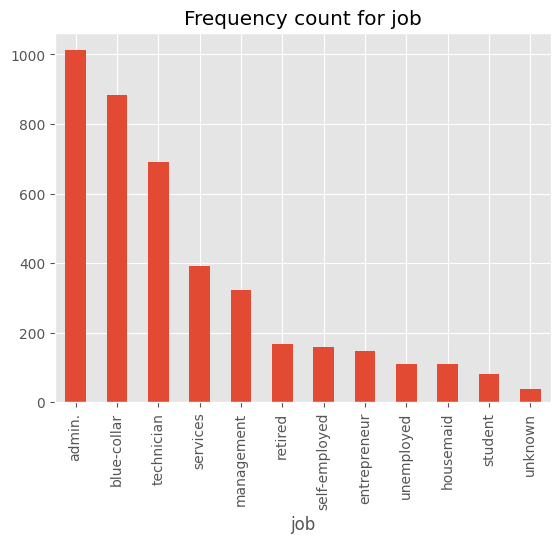

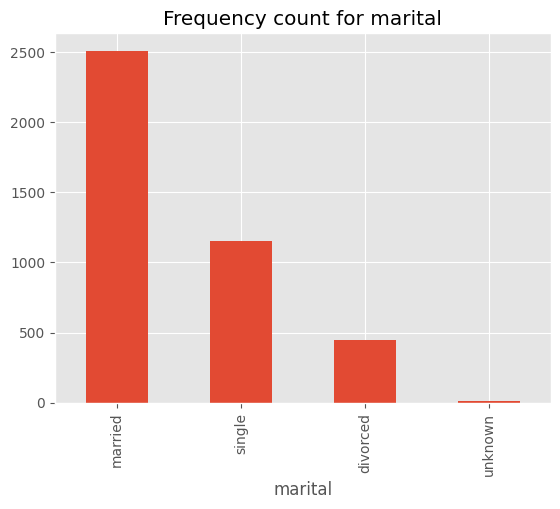

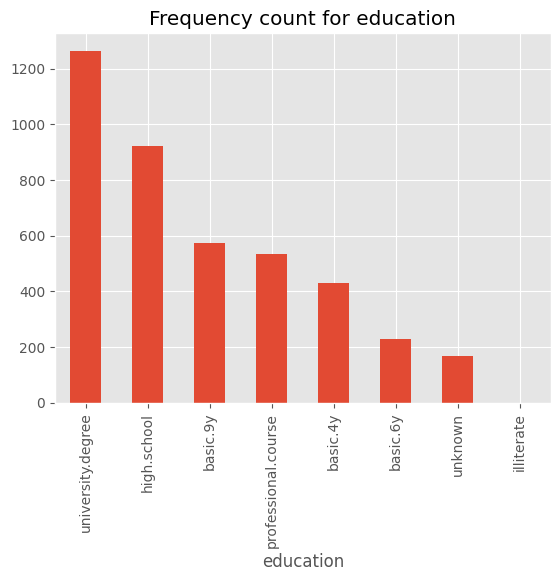

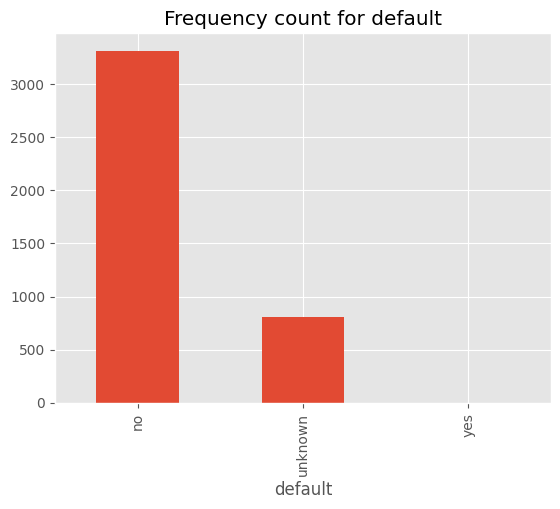

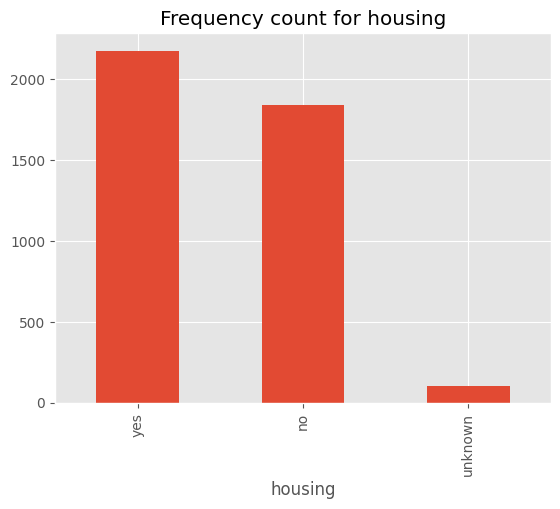

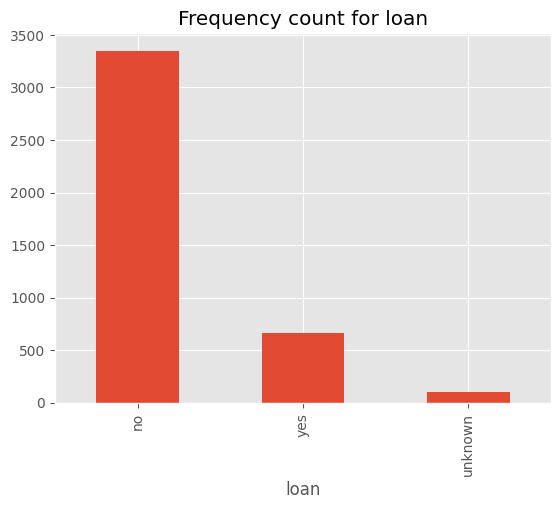

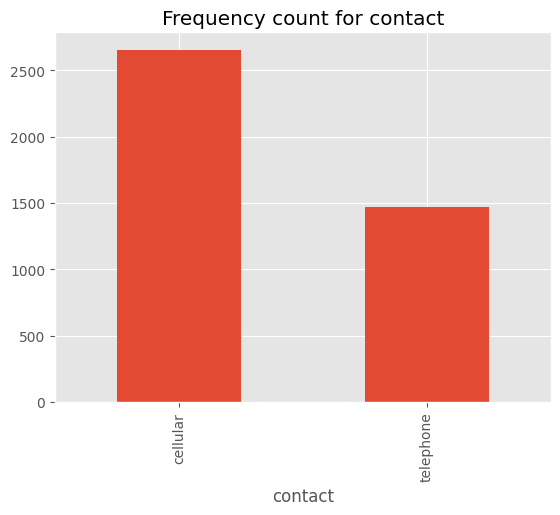

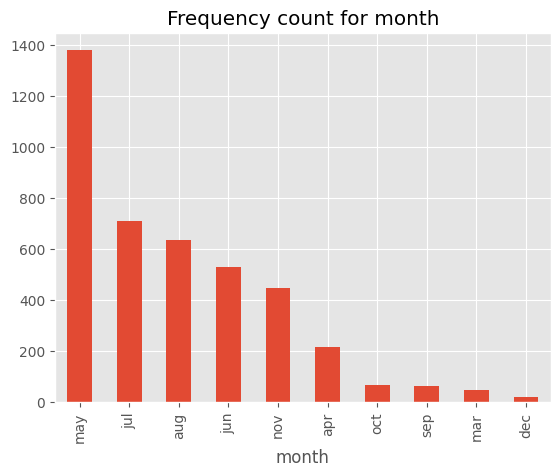

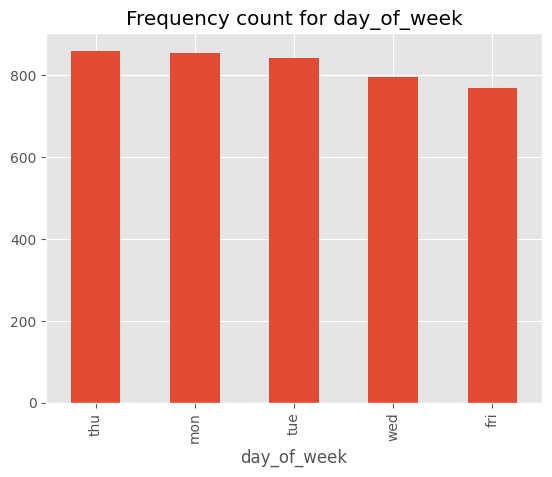

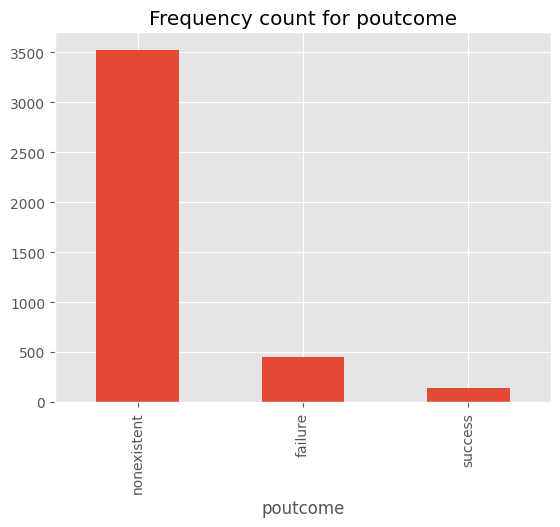

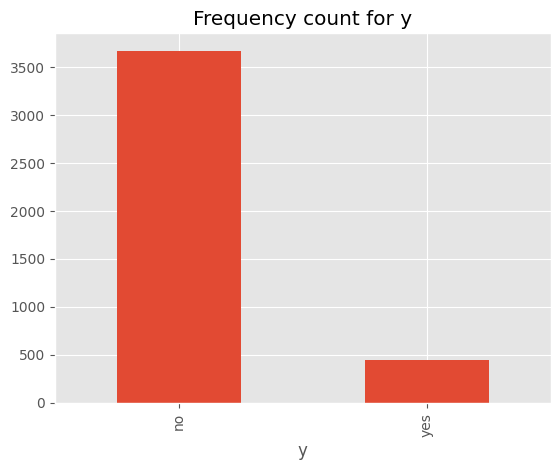

In [200]:
# Barchart for object features
for cat in cat_list:
    df[cat].value_counts().plot(kind = 'bar', title = f"Frequency count for {cat}")
    plt.show();


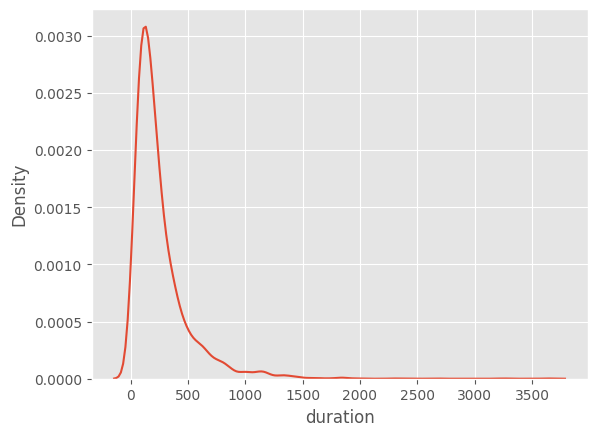

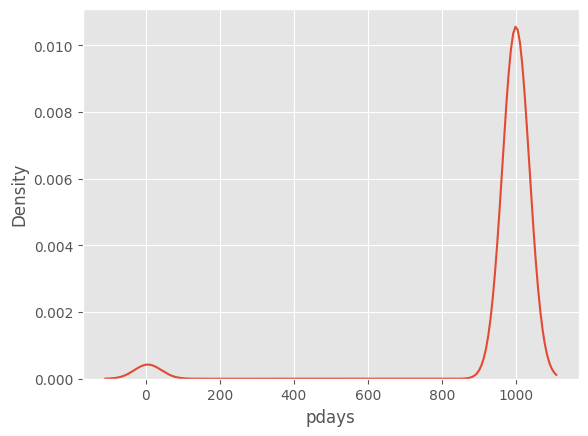

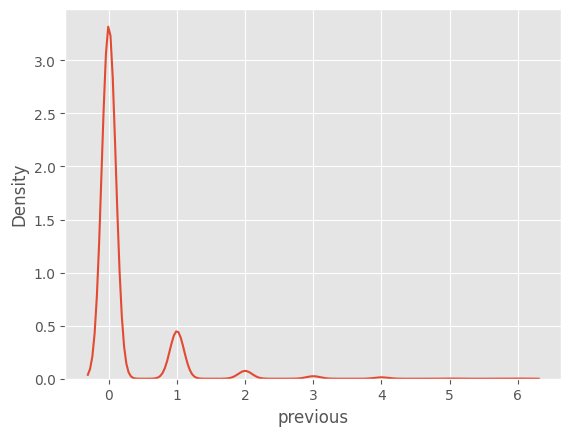

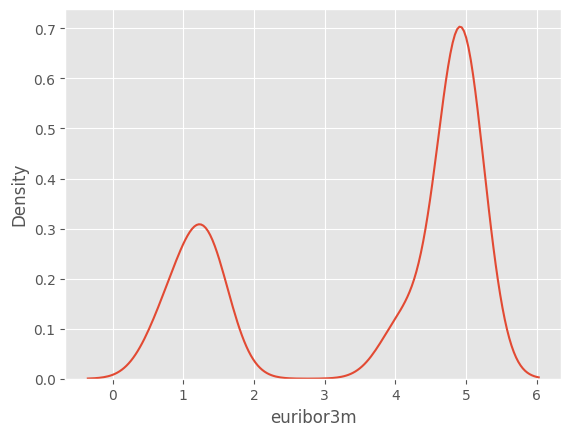

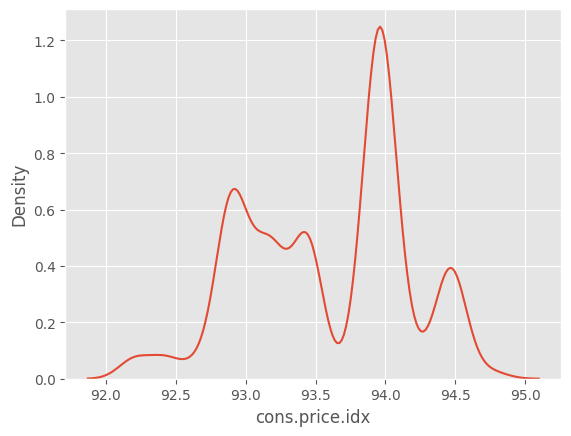

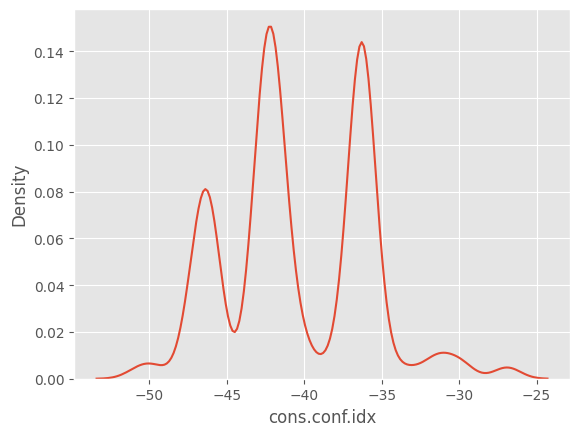

In [201]:
# KDE for duration, pdays, previous, euribor3m
for col in ['duration', 'pdays', 'previous', 'euribor3m', 'cons.price.idx', 'cons.conf.idx']:
    sns.kdeplot(data = df, x = col)
    plt.show()

In [202]:
#Display the distribution of Y=1 vs Y=0
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df['y'].value_counts(normalize= True).to_frame().style.format('{:.1%}')
df['y'].value_counts(normalize= True).round(4).multiply(100).plot(kind = 'bar', backend = 'plotly')

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

##Business Objective
**Improve the bank’s term-deposit subscription rate and campaign ROI by predicting—prior to outreach—which customers are most likely to subscribe, so marketing can prioritize high-propensity leads and tailor timing/messaging accordingly.**

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [203]:
#In all columns print out unknown value count
for col in df.columns:
    print(col)
    value_counts = df[col].value_counts()
    if 'unknown' in value_counts:
        print(value_counts['unknown'])
    else:
        print("No 'unknown' values in this column.")
#Drop unknow values in calatorical variables
for col in cat_list:
    df = df[df[col] != 'unknown']



age
No 'unknown' values in this column.
job
39
marital
11
education
167
default
803
housing
105
loan
105
contact
No 'unknown' values in this column.
month
No 'unknown' values in this column.
day_of_week
No 'unknown' values in this column.
duration
No 'unknown' values in this column.
campaign
No 'unknown' values in this column.
pdays
No 'unknown' values in this column.
previous
No 'unknown' values in this column.
poutcome
No 'unknown' values in this column.
emp.var.rate
No 'unknown' values in this column.
cons.price.idx
No 'unknown' values in this column.
cons.conf.idx
No 'unknown' values in this column.
euribor3m
No 'unknown' values in this column.
nr.employed
No 'unknown' values in this column.
y
No 'unknown' values in this column.


In [204]:
#One-hot encoding for catagorocal features
df = pd.get_dummies(df, columns=['loan', 'housing', 'default'], drop_first=True)
display(df.head())

,age,job,marital,education,contact,month,day_of_week,duration,campaign,pdays,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,loan_yes,housing_yes,default_yes
0,30,blue-collar,married,basic.9y,cellular,may,fri,487,2,999,...,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,False,True,False
1,39,services,single,high.school,telephone,may,fri,346,4,999,...,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,False,False,False
2,25,services,married,high.school,telephone,jun,wed,227,1,999,...,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,False,True,False
4,47,admin.,married,university.degree,cellular,nov,mon,58,1,999,...,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,False,True,False
5,32,services,single,university.degree,cellular,sep,thu,128,3,999,...,failure,-1.1,94.199,-37.5,0.884,4963.6,0,False,False,False


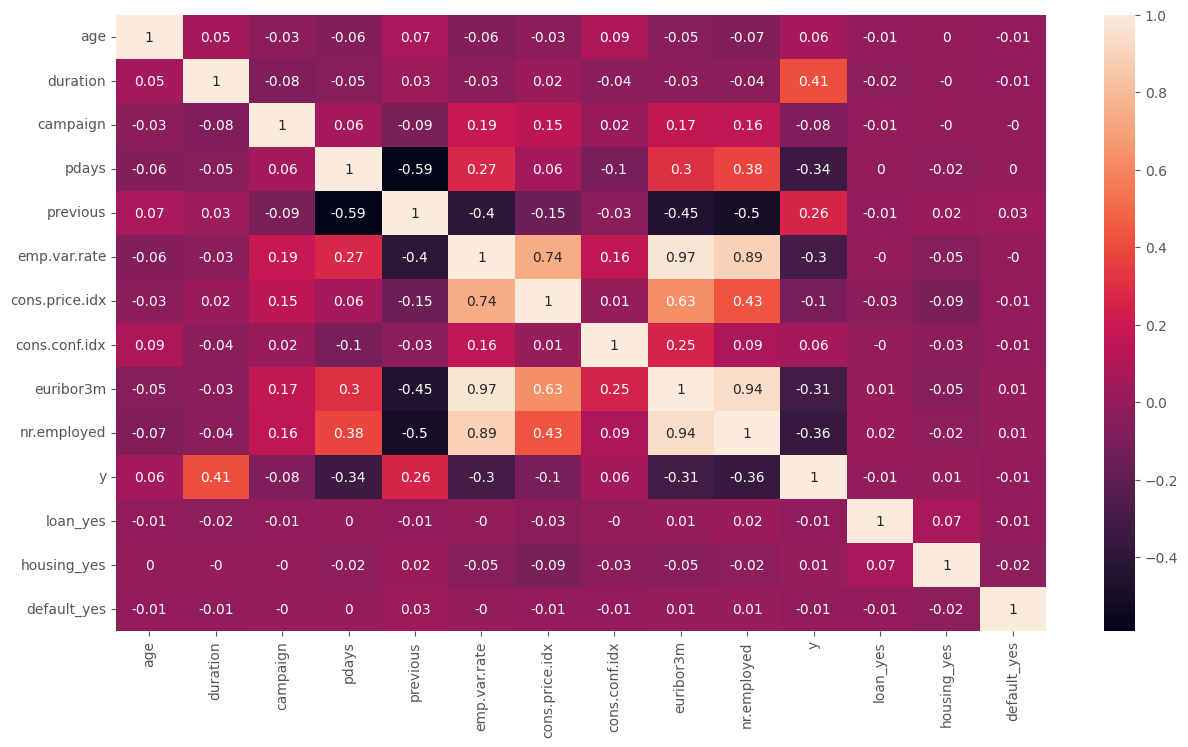

In [205]:
#Corr matic with all the numaric a bool values in df
corr = df.corr(numeric_only = True).round(2)
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True);



In [206]:
#Drop rows with high multicollinearity
#drop emp.var.rate, nr.employed as they have very high multicollinearity with euribor3m
df.drop(['emp.var.rate', 'nr.employed'], axis=1, inplace=True)
#drop default_yes, loan_yes, housing_yes as they have very low correaltion with Y and every other value
df.drop(['default_yes', 'loan_yes', 'housing_yes'], axis=1, inplace=True)

#drop rows month and days_in_the_week as pdays tell when the person was last contacted
df.drop(['month', 'day_of_week'], axis=1, inplace=True)


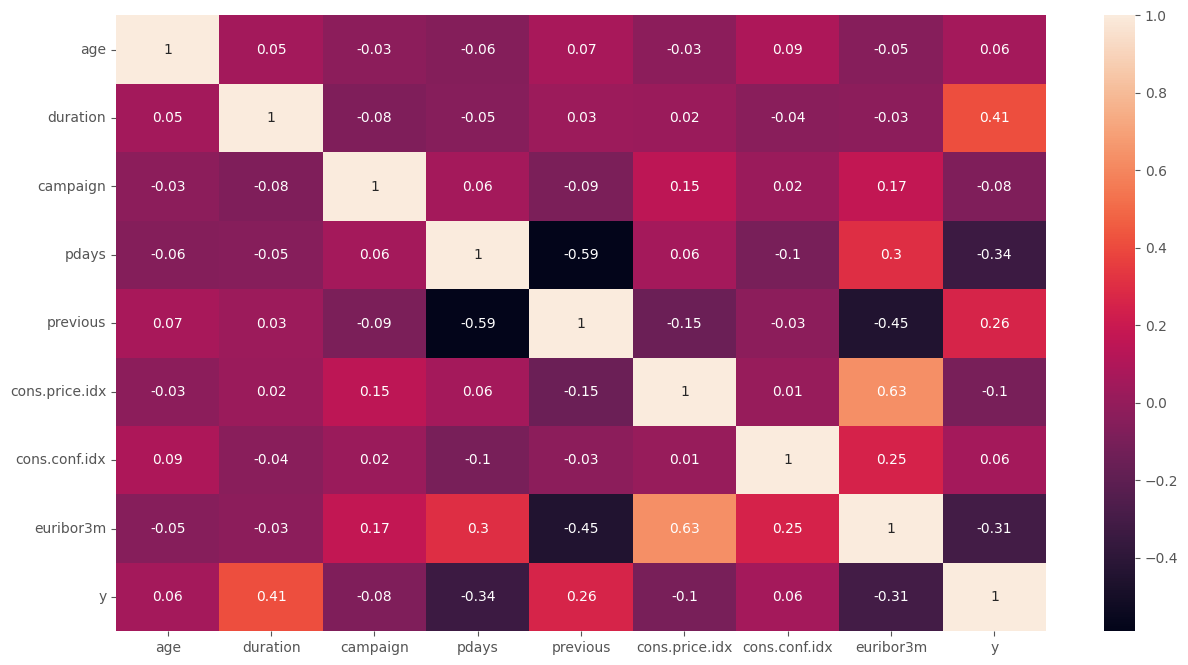

In [207]:
#draw a corr matic with all the numaric a bool values in df after data cleaning
corr = df.corr(numeric_only = True).round(2)
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True);


In [208]:
#Do one-hot encoding on all the columns that are non numeric
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'poutcome'], drop_first=True)


In [209]:
df.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,job_blue-collar,...,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_telephone,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,92.893,-46.2,1.313,0,True,...,False,False,True,False,False,False,False,False,True,False
1,39,346,4,999,0,93.994,-36.4,4.855,0,False,...,True,False,False,True,False,False,False,True,True,False
2,25,227,1,999,0,94.465,-41.8,4.962,0,False,...,False,False,False,True,False,False,False,True,True,False
4,47,58,1,999,0,93.200,-42.0,4.191,0,False,...,False,False,False,False,False,False,True,False,True,False
5,32,128,3,999,2,94.199,-37.5,0.884,0,False,...,True,False,False,False,False,False,True,False,False,False


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [210]:
# data prep


In [211]:
# splitting the data
X = df.drop(columns = 'y')
y = df['y']

In [212]:
# # doing train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [213]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)


print("\n")

print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

display(x_train.head())
display(y_train.head())

x_train:  (2163, 29)
y_train:  (2163,)


x_test:  (927, 29)
y_test:  (927,)


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_entrepreneur,...,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_telephone,poutcome_nonexistent,poutcome_success
3268,20,410,1,999,0,92.893,-46.2,1.334,True,False,...,True,False,False,True,False,False,False,False,True,False
2616,34,169,1,7,2,92.649,-30.1,0.714,False,False,...,True,False,False,False,False,False,True,False,False,True
496,23,251,1,999,0,93.918,-42.7,4.957,True,False,...,True,False,False,True,False,False,False,False,True,False
3899,46,124,4,999,0,93.075,-47.1,1.405,False,False,...,False,False,False,True,False,False,False,False,True,False
290,37,211,2,999,0,93.994,-36.4,4.857,True,False,...,True,False,True,False,False,False,False,True,True,False


,y
3268,0
2616,1
496,0
3899,0
290,0


In [214]:
#list all columns that are not part of one-hot encoding
to_be_scaled_cols = ['age', 'campaign', 'pdays', 'previous', 'euribor3m', 'cons.price.idx', 'cons.conf.idx']

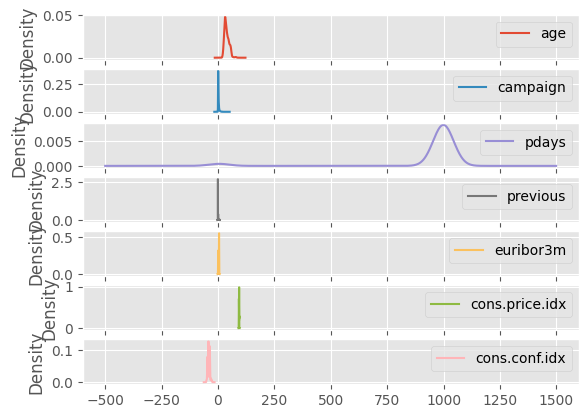

In [170]:
x_train[to_be_scaled_cols].plot(kind = 'kde', subplots = True);

In [171]:
from sklearn.preprocessing import StandardScaler

# calling the scaler
scaler = StandardScaler()

# train data scaling
x_train[to_be_scaled_cols] = scaler.fit_transform(x_train[to_be_scaled_cols])

# test data scaling
x_test[to_be_scaled_cols] = scaler.transform(x_test[to_be_scaled_cols])

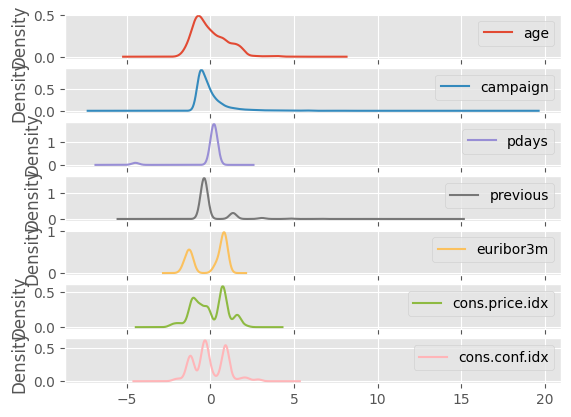

In [172]:
x_train[to_be_scaled_cols].plot(kind = 'kde', subplots = True);

In [173]:
x_train[to_be_scaled_cols].agg(['mean', 'std']).round(1)

,age,campaign,pdays,previous,euribor3m,cons.price.idx,cons.conf.idx
mean,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [174]:
from sklearn.dummy import DummyClassifier

In [175]:
dummy = DummyClassifier()

In [176]:
dummy.fit(x_train, y_train)

DummyClassifier()

In [177]:
print(f"The accuracy score of the model for Train is {dummy.score(x_train, y_train):.2f}")
print(f"The accuracy score of the model for Test is {dummy.score(x_test, y_test):.2f}")

The accuracy score of the model for Train is 0.87
The accuracy score of the model for Test is 0.90


In [178]:
#compute AP
from sklearn.metrics import average_precision_score, precision_recall_curve
ap= average_precision_score(y_test, dummy.predict(x_test))
print(f"The average precision score of the model is {ap:.2f}")

The average precision score of the model is 0.10


**Average precision score of the model is 0.10 for the baseline model for dummyclassifier**

The baseline model, a DummyClassifier, achieved an accuracy of 0.90 on the test set. However, given the imbalanced nature of the dataset (where the vast majority of clients did not subscribe), accuracy is not a reliable metric. A more informative metric for this problem is Average Precision (PR-AUC). The baseline model's Average Precision on the test set was 0.10. This indicates that a model making random predictions would achieve an Average Precision roughly equal to the proportion of the positive class in the dataset. Therefore, any effective predictive model should aim to significantly outperform this 0.10 Average Precision baseline.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [180]:
lr = LogisticRegression()

In [181]:
lr_cv_scores = cross_val_score(lr, x_train, y_train, cv = 5)

print([f"{score:.3f}" for score in lr_cv_scores])
print('\n')
print(f"The mean accuracy across cv = 5 was {lr_cv_scores.mean():.3f}")

['0.901', '0.915', '0.887', '0.903', '0.877']


The mean accuracy across cv = 5 was 0.896


In [182]:
# fit the model
lr.fit(x_train, y_train)

# predictions
y_pred = lr.predict(x_test)

print(f"The accuracy score of the model for Train is {lr.score(x_train, y_train):.2f}")
print(f"The accuracy score of the model for test is {lr.score(x_test, y_test):.2f}")

The accuracy score of the model for Train is 0.90
The accuracy score of the model for test is 0.91


In [183]:
ap= average_precision_score(y_test, lr.predict(x_test))
print(f"The average precision score of the model is {ap:.2f}")

The average precision score of the model is 0.34


**Confusion Matrix**

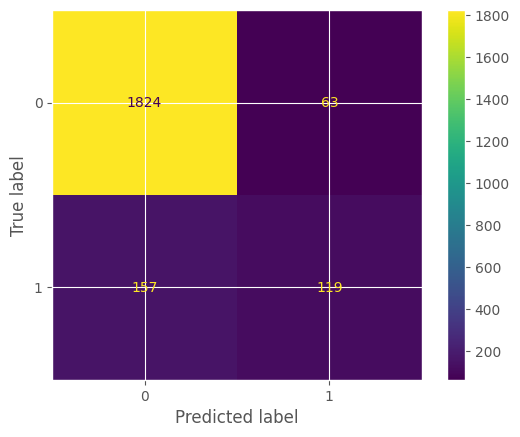

In [184]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
train_predictions = lr.predict(x_train)

# confusion matrix
cm = confusion_matrix(y_train, train_predictions, labels = lr.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix= cm,display_labels= lr.classes_)
disp.plot()
plt.show()

In [185]:
from sklearn.metrics import classification_report
target_names = ['not cancelled', 'cancelled']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

not cancelled       0.94      0.96      0.95       833
    cancelled       0.60      0.48      0.53        94

     accuracy                           0.91       927
    macro avg       0.77      0.72      0.74       927
 weighted avg       0.91      0.91      0.91       927



### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [186]:
pipelines = {
    'lr': Pipeline([('classifier', LogisticRegression())]),
    'knn': Pipeline([('classifier', KNeighborsClassifier())]),
    'dt': Pipeline([('classifier', DecisionTreeClassifier())]),
    'svm': Pipeline([('classifier', SVC())])
}

In [187]:
import time

scores = {}
for model_name, pipeline in pipelines.items():
    start_time = time.time()
    pipeline.fit(x_train, y_train.values.ravel())
    end_time = time.time()
    fit_time = end_time - start_time
    score = cross_val_score(pipeline, x_train, y_train.values.ravel(), cv=5, scoring='accuracy').mean()
    #accuracy score of the model for test
    score_test = pipeline.score(x_test, y_test)
    scores[model_name] = {'Train Accuracy': score, 'Test Accuracy': score_test, 'Train Time': fit_time}
print(f"Model | Train Time | Train Accuracy | Test Accuracy")
for model_name, score_data in scores.items():
    print(f"{model_name}    | {score_data['Train Time']:.2f}    | {score_data['Train Accuracy']:.3f}          | {score_data['Test Accuracy']:.3f}")


Model | Train Time | Train Accuracy | Test Accuracy
lr    | 0.03    | 0.896          | 0.915
knn    | 0.00    | 0.878          | 0.889
dt    | 0.01    | 0.868          | 0.898
svm    | 0.06    | 0.881          | 0.899


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##Selecting performance metric
Why **Average Precision (PR-AUC)** is the right **primary metric for our business case**

**Matches how we work:**  AP measures how well the model ranks true subscribers to the top across all possible cutoffs, which is exactly what we need.

**Handles class imbalance:** Subscribers are a minority. Accuracy and even ROC-AUC can look fine while still wasting many calls. AP focuses on the precision–recall trade-off for the positive class (subscribers), so lift at the top truly reflects business value.

**Minimizes wasted calls:** Higher AP means more real subscribers appear early in the list, so for a fixed call budget we convert more and waste fewer calls.

**Cost asymmetry aware:** A false positive (calling a “no”) costs time/money; a false negative (missing a likely “yes”) costs revenue. AP emphasizes placing likely “yes” early, aligning with our precision-weighted incentives.

**Threshold-free model selection:** Budgets and staffing change day-to-day. AP lets us pick the best model without locking in one threshold. Later we can set a cutoff that fits that day’s capacity.

**Clear baseline & interpretability:** Baseline AP equals the prevalence (e.g., if ~11% subscribe, random AP ≈ 0.11). An AP well above baseline directly quantifies lift over random, which is easy to explain.

In [188]:
SCORING = "average_precision"  # <-- use AP/PR-AUC everywhere

def get_positive_scores(estimator, X):
    """
    Return continuous scores for the positive class.
    Prefer predict_proba; fallback to decision_function; last-resort: predict labels.
    """
    if hasattr(estimator, "predict_proba"):
        proba = estimator.predict_proba(X)
        if proba.ndim == 2 and proba.shape[1] >= 2:
            return proba[:, 1]
        return np.asarray(proba).ravel()
    if hasattr(estimator, "decision_function"):
        df = estimator.decision_function(X)
        return df if df.ndim == 1 else df[:, 1]
    return estimator.predict(X)

def evaluate_ap(estimator, X, y, label=None, plot=True):
    scores = get_positive_scores(estimator, X)
    ap = average_precision_score(y, scores)
    print(f"{label or estimator.__class__.__name__} — Average Precision (PR-AUC): {ap:.4f}")
    if plot:
        precision, recall, _ = precision_recall_curve(y, scores)
        plt.figure()
        plt.step(recall, precision, where="post")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title(label or estimator.__class__.__name__)
        plt.show()
    return ap

def ap_grid_search(pipe, param_grid, *, cv=5):
    """Grid search with AP scoring; returns fitted GridSearchCV."""
    gs = GridSearchCV(pipe, param_grid, cv=cv, scoring=SCORING, n_jobs=-1, refit=True)
    gs.fit(x_train, y_train)
    print(f"[CV best AP] {pipe.named_steps[list(pipe.named_steps.keys())[-1]].__class__.__name__}: {gs.best_score_:.4f}")
    print("Best params:", gs.best_params_)
    return gs

results = {}


[CV best AP] LogisticRegression: 0.6131
Best params: {'lgr__C': np.float64(0.1)}
Test set:
LogisticRegression — Average Precision (PR-AUC): 0.5984


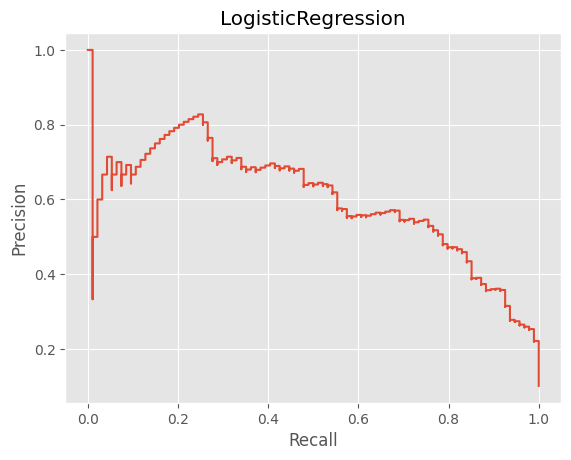

In [189]:
# 1) Logistic Regression
lgr_pipe = Pipeline([
    ("lgr", LogisticRegression(max_iter=1000))
])
param_lgr = {"lgr__C": np.logspace(-3, 3, 7)}
gs_lgr = ap_grid_search(lgr_pipe, param_lgr)
print("Test set:"); ap_lgr = evaluate_ap(gs_lgr.best_estimator_, x_test, y_test, label="LogisticRegression")
results["LogisticRegression"] = ap_lgr

[CV best AP] SVC: 0.5563
Best params: {'svc__C': 320, 'svc__decision_function_shape': 'ovr', 'svc__gamma': 0.0001, 'svc__kernel': 'rbf'}
Test set:
SVC (RBF) — Average Precision (PR-AUC): 0.5069


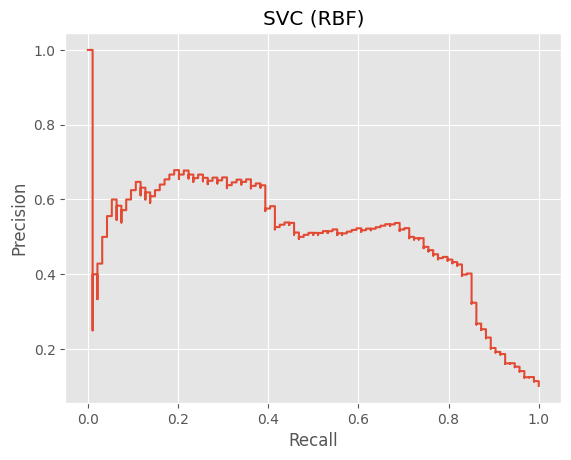

In [190]:
# 2) SVC
from sklearn.svm import SVC
svc_pipe = Pipeline([
    ("svc", SVC(kernel="rbf"))
])
param_svc = {
    'svc__C': [ 160, 180, 200,220, 240, 260, 280, 300, 320, 340, 360],
    'svc__gamma': [10,1,0.1, 0.01, 0.001, 0.0001,0],
    'svc__kernel': ['rbf'],
    'svc__decision_function_shape': ['ovr']
}
gs_svc = ap_grid_search(svc_pipe, param_svc, cv=3)
print("Test set:"); ap_svc = evaluate_ap(gs_svc.best_estimator_, x_test, y_test, label="SVC (RBF)")
results["SVC (RBF)"] = ap_svc

In [191]:
#print svm test score
print(f"The accuracy score of the model for test is {gs_svc.best_estimator_.score(x_test, y_test):.2f}")

The accuracy score of the model for test is 0.91


[CV best AP] KNeighborsClassifier: 0.4621
Best params: {'knn__n_neighbors': 25, 'knn__p': 1, 'knn__weights': 'distance'}
Test set:
KNN — Average Precision (PR-AUC): 0.4325


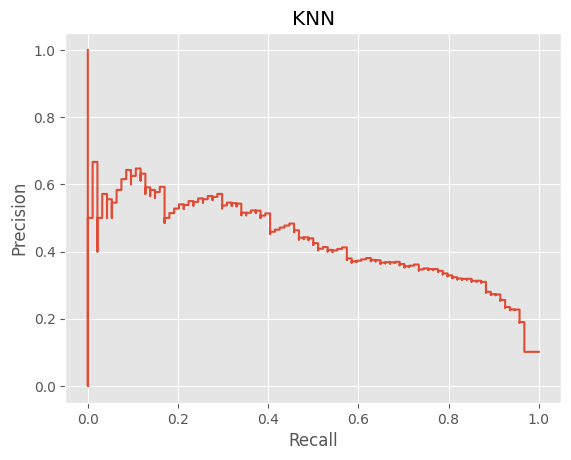

In [192]:
# 3) KNN (scaled)
knn_pipe = Pipeline([
    ("knn", KNeighborsClassifier())
])
param_knn = {
    "knn__n_neighbors": list(range(25, 71)),
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2],
}
gs_knn = ap_grid_search(knn_pipe, param_knn)
print("Test set:"); ap_knn = evaluate_ap(gs_knn.best_estimator_, x_test, y_test, label="KNN")
results["KNN"] = ap_knn

[CV best AP] DecisionTreeClassifier: 0.5793
Best params: {'dt__ccp_alpha': np.float64(0.001686159556434294)}
Test set:
DecisionTree (pruned) — Average Precision (PR-AUC): 0.5163


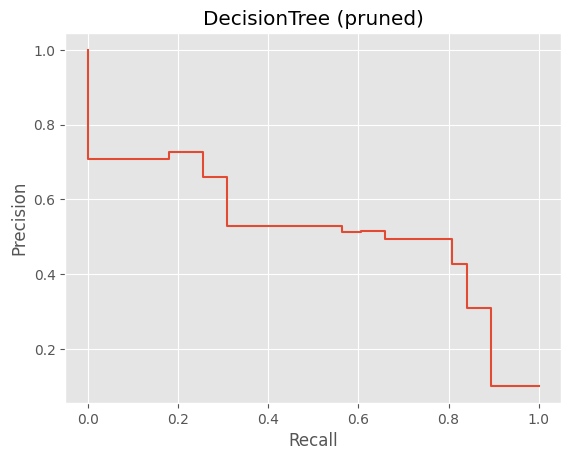

In [193]:

# 5) Decision Tree (AP-scored grid)
dt_pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])
param_dt = {
    "dt__max_depth": [None, 3, 5, 7, 10],
    "dt__min_samples_split": [2, 10, 25],
    "dt__min_impurity_decrease": [0.0, 1e-4, 1e-3]
}
gs_structure = GridSearchCV(
    dt_pipe,
    param_grid=param_dt,
    scoring="accuracy",
    n_jobs=-1,
    refit=True,
)
gs_structure.fit(x_train, y_train)
best_dt_structure = gs_structure.best_estimator_


probe = DecisionTreeClassifier(**best_dt_structure.named_steps['dt'].get_params())
probe.set_params(ccp_alpha=0.0)
probe.fit(x_train, y_train)
ccp_alphas = probe.cost_complexity_pruning_path(x_train, y_train).ccp_alphas
impurities= probe.cost_complexity_pruning_path(x_train, y_train).impurities

ccp_candidates = np.unique(ccp_alphas[:-1])
if ccp_candidates.size == 0:
    ccp_candidates = np.array([0.0])
elif ccp_candidates.size > 25:
    ccp_candidates = np.quantile(ccp_candidates, np.linspace(0, 1, 25))

prune_pipe = Pipeline([("dt", DecisionTreeClassifier(**best_dt_structure.named_steps['dt'].get_params()))])
param_prune = {
    "dt__ccp_alpha": ccp_candidates,
}
gs_dt_prune = ap_grid_search(prune_pipe, param_prune)
print("Test set:"); ap_dt_pruned = evaluate_ap(gs_dt_prune.best_estimator_, x_test, y_test, label="DecisionTree (pruned)")
results["DecisionTree (pruned)"] = ap_dt_pruned

Model Comparison (Average Precision - PR-AUC):


,Average Precision (PR-AUC)
LogisticRegression,0.598364
DecisionTree (pruned),0.516316
SVC (RBF),0.506862
KNN,0.432534


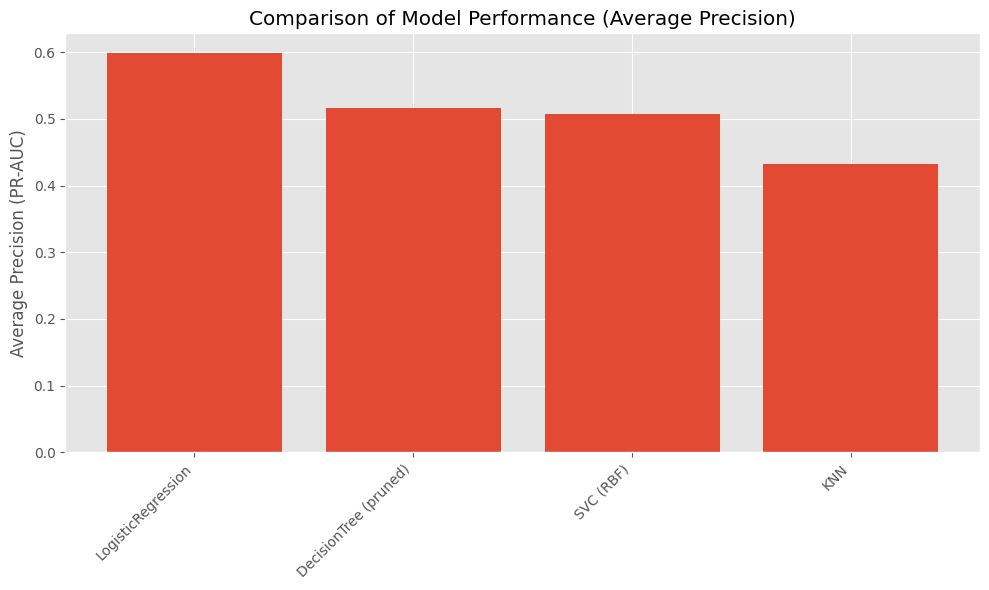

In [194]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Average Precision (PR-AUC)'])

# Sort the DataFrame by Average Precision
results_df = results_df.sort_values(by='Average Precision (PR-AUC)', ascending=False)

# Display the table
print("Model Comparison (Average Precision - PR-AUC):")
display(results_df)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(results_df.index, results_df['Average Precision (PR-AUC)'])
plt.ylabel('Average Precision (PR-AUC)')
plt.title('Comparison of Model Performance (Average Precision)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Model comparison
Logistic Regression (regularized) — AP ≈ 0.60 (best)

Decision Tree (pruned) — AP ≈ 0.52

SVC (RBF) — AP ≈ 0.51

KNN — AP ≈ 0.47

All models show ~0.90 accuracy due to imbalance, but Logistic Regression yields the highest Average Precision, meaning it concentrates true “yes” customers near the top of the ranked list better than the others.

# Why AP (Average Precision) fits our problem.
With only 10% “yes,” accuracy can look great even if we waste many calls. AP measures how many real “yes” customers appear early in the model’s ordering—the exact business goal when calling top-ranked leads first. The baseline AP equals the prevalence (0.10); our best model reaches 0.60, about 6× better than random, translating to far more sign-ups per 100 calls (or the same sign-ups with many fewer calls).
# Findings for non-technical audience
Using this model will make outreach far more efficient for your team: it ranks customers by likelihood to subscribe so you call the best prospects first. In our tests, it delivered about 6× the lift over calling at random. In plain terms, if you currently get 10 sign-ups per 100 calls, the model can raise that to roughly 30–60 sign-ups per 100 calls (depending on weekly call volume), which means 3–6× more results for the same effort—or reaching the same results with 60–80% fewer calls. The payoff: fewer wasted calls, lower cost per acquisition, and faster attainment of sales targets.
## Next Steps and Recommendations

Based on the analysis and model comparison, the Logistic Regression model currently demonstrates the best performance in terms of Average Precision (PR-AUC), which aligns well with our business objective of prioritizing high-propensity leads.

Here are some potential next steps and recommendations for further improvement:

1.  **Further Feature Engineering**: Explore creating new features or transforming existing ones based on domain knowledge or insights gained from the data. For example, investigating interactions between features or creating age groups.
2.  **Explore Other Models**: Investigate other classification algorithms that might be suitable for this problem, such as Gradient Boosting Machines (e.g., XGBoost, LightGBM) or Neural Networks.
3.  **Address Class Imbalance**: Although Average Precision is less sensitive to class imbalance than accuracy, techniques like oversampling the minority class (subscribers) or undersampling the majority class could be explored to see if they further improve model performance, particularly recall for the positive class.
